# Umba Python Challenge

- In the provided `weekly_logins` table you have activity on all the logins taking place
- The question that we are looking to answer is: what categories or groups here had high engagement (weekly logins) levels?
- Use whatever tools you need to answer this question, and please take this as an opportunity to display your analytical and technical skills
- Please elaborate on your reasoning for decisions made when analyzing the data set by providing your analysis

### Importing CSV File

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
weekly_logins = pd.read_csv('weekly_logins.csv')
weekly_logins.head()

,User Name,Slack Integration,Most Used Page,Had Free Trial,User MRR,Weekly Logins,Company Name,Industry,Company Size,Territory,Sales Call in Trial,Zendesk Integration,Salesforce Integration,Gmail Integration,Most common referrer,Most common IP,Sales Touches to Close,Used Admin Panel,Has Issued Support Request
0,Nilsa Harmon,No,/home,No,39,2,HP,Technology,>$10B,West,No,Yes,No,Yes,hotels.com,165.227.215.62,5,No,No
1,Joni Catano,No,/tool/storyboard,No,39,6,HP,Technology,>$10B,West,No,Yes,Yes,No,hotels.com,159.203.166.41,16,No,Yes
2,Emmett Jeffries,Yes,/tool/search,Yes,169,3,HP,Technology,>$10B,West,Yes,No,Yes,No,hotels.com,159.203.166.41,4,No,Yes
3,Dian Boisse,No,/tool/storyboard,No,39,2,HP,Technology,>$10B,West,No,Yes,No,No,zoom.com,162.243.108.129,15,No,Yes
4,Barbara Herrera,No,/tool/storyboard,No,1299,7,HP,Technology,>$10B,West,No,No,Yes,No,/mail.google.com,159.203.166.41,5,No,Yes


Before manipulating the data, let's get a better picture of the structure of the data and the table.

In [75]:
print(weekly_logins.shape)

(1718, 19)


In [56]:
print(weekly_logins.columns)

Index(['User Name', 'Slack Integration', 'Most Used Page', 'Had Free Trial',
       'User MRR', 'Weekly Logins', 'Company Name', 'Industry', 'Company Size',
       'Territory', 'Sales Call in Trial', 'Zendesk Integration',
       'Salesforce Integration', 'Gmail Integration', 'Most common referrer',
       'Most common IP', 'Sales Touches to Close', 'Used Admin Panel',
       'Has Issued Support Request'],
      dtype='object')


To answer the question of what categories or groups here had high engagement, I will first take a look at the sorted number of weekly logins per individual from highest to lowest.

In [76]:
sorted_weekly_logins = weekly_logins.sort_values(by=['Weekly Logins'], ascending=False)
sorted_weekly_logins.head(10)

,User Name,Slack Integration,Most Used Page,Had Free Trial,User MRR,Weekly Logins,Company Name,Industry,Company Size,Territory,Sales Call in Trial,Zendesk Integration,Salesforce Integration,Gmail Integration,Most common referrer,Most common IP,Sales Touches to Close,Used Admin Panel,Has Issued Support Request
1267,Charlie Hurrell,No,/tool/storyboard,Yes,39,17,Visa,Technology,>$10B,West,No,Yes,Yes,Yes,/mail.google.com,198.199.120.102,6,No,Yes
341,Paul Krupp,Yes,/tool/storyboard,Yes,169,17,Lucky Brand,Consumer Products,$100M - $500M,West,No,No,No,Yes,/slack.com,138.197.222.35,4,Yes,No
452,Brigid Watson,No,/tool/storyboard,Yes,39,17,Siemon,Manufacturing,$100M - $500M,Midwest,No,No,Yes,Yes,hotels.com,192.200.200.99,14,Yes,Yes
578,George Palmer,Yes,/tool/storyboard,Yes,39,17,SpaceX,Technology,$1B - $10B,West,No,Yes,No,No,/quora,174.138.54.49,9,No,No
1202,Claudia Wilson,No,/tool/storyboard,Yes,169,17,Visa,Technology,>$10B,West,No,Yes,Yes,Yes,/facebook.com,198.199.120.102,5,Yes,No
1537,Evelyn Andrade,No,/tool/storyboard,Yes,169,17,Yahoo! Inc.,Technology,$1B - $10B,West,Yes,Yes,Yes,No,/tripadvisor.com,162.243.108.161,6,No,Yes
225,Felicia Rawson,No,/tool/storyboard,Yes,39,16,InVision,Technology,$100M - $500M,East,Yes,No,Yes,Yes,/facebook.com,162.243.107.120,11,No,Yes
968,Emelda Marbut,Yes,/tool/storyboard,Yes,39,16,US Soccer Federation,Hospitality,<$100M,Midwest,No,No,Yes,Yes,hotels.com,198.199.120.102,4,Yes,Yes
147,Carroll Miles,Yes,/tool/storyboard,Yes,39,16,Hushmail,Technology,$100M - $500M,West,No,No,Yes,Yes,/facebook.com,72.35.40.34,13,No,No
1463,Matthew Jackson,No,/tool/storyboard,Yes,169,16,Worldsource Wealth Management,Finance,$100M - $500M,East,Yes,Yes,Yes,Yes,hotels.com,138.68.41.90,15,Yes,No


My first assumption is that companies would be the good place to start. I assumed that certain companies would have much greater levels of engagement, given software adoption rates and how frequently it was used by employees. I checked the counts of each company to make sure there were sizable amounts of data from each company. 

In [51]:
sorted_weekly_logins.groupby(["Company Name"])["Weekly Logins"].agg(np.size)

Company Name
HP                                69
Huron Consulting Group            42
Hushmail                          83
InVision                          51
LiveRamp                          69
Lucky Brand                       73
Lush                              26
One Legal                         25
Siemon                           118
SpaceX                            92
Stupp Bros                       100
TaxSlayer, LLC                   100
Twilio                            92
US Soccer Federation             133
Uniform Law Commission            73
Veritext                          14
Visa                             144
Wal-Mart Stores                   67
Whitesell Corporation             15
Worldsource Wealth Management    137
Yahoo! Inc.                       66
Zendesk                           80
Zoom Video Communications         49
Name: Weekly Logins, dtype: int64

In [77]:
sorted_weekly_logins.groupby(["Company Name", "Company Size"])["Weekly Logins"].agg([np.mean, np.median, np.min, np.max, np.std])

,,mean,median,amin,amax,std
Company Name,Company Size,,,,,
HP,>$10B,5.985507,5.0,1,16,4.042032
Huron Consulting Group,$500M - $1B,6.523810,5.0,0,15,3.664185
Hushmail,$100M - $500M,5.915663,5.0,0,16,3.936089
InVision,$100M - $500M,6.352941,6.0,0,16,3.587888
LiveRamp,$100M - $500M,5.985507,5.0,1,15,3.393301
Lucky Brand,$100M - $500M,6.136986,5.0,0,17,4.151021
Lush,$100M - $500M,6.153846,5.5,2,15,3.749051
One Legal,<$100M,8.000000,7.0,3,15,3.500000
Siemon,$100M - $500M,6.305085,5.0,0,17,4.154101


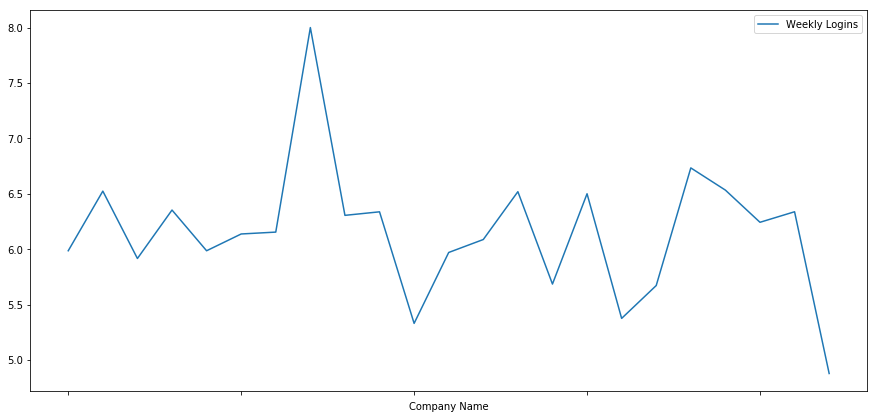

In [84]:
fig, ax = plt.subplots(figsize=(15,7))
sorted_weekly_logins.groupby(["Company Name"])[columns_to_show].agg(np.mean).plot(ax=ax)

If we do a quick plot of the results of grouping by company, we see that the number of weekly logins per employee ranges from approximately 5 to 6.5. One small outlier is One Legal, where the average number of weekly logins per employee was 8.0.

# Taking a Deeper Look at One Legal

If we take a closer look at only the employees from One Legal, we can try to decipher if there are any categories which makes their number of weekly logins so much higher than the rest of the other companies.

In [86]:
one_legal_weekly_logins = sorted_weekly_logins[sorted_weekly_logins["Company Name"] == "One Legal"]
one_legal_weekly_logins.head()

,User Name,Slack Integration,Most Used Page,Had Free Trial,User MRR,Weekly Logins,Company Name,Industry,Company Size,Territory,Sales Call in Trial,Zendesk Integration,Salesforce Integration,Gmail Integration,Most common referrer,Most common IP,Sales Touches to Close,Used Admin Panel,Has Issued Support Request
433,Paul Elliott,Yes,/tool/storyboard,Yes,169,15,One Legal,Legal Services,<$100M,East,No,No,No,Yes,zoom.com,162.243.108.161,8,No,Yes
414,Susan Stephenson,Yes,/tool/storyboard,Yes,169,13,One Legal,Legal Services,<$100M,East,Yes,Yes,No,No,/mail.google.com,142.93.8.33,15,Yes,Yes
432,Larry Searles,Yes,/tool/storyboard,Yes,39,13,One Legal,Legal Services,<$100M,East,No,No,No,No,/tripadvisor.com,192.200.200.99,7,No,No
430,Casimira Anders,Yes,/tool/storyboard,Yes,169,13,One Legal,Legal Services,<$100M,East,No,No,No,Yes,/mail.google.com,67.205.132.241,8,No,No
423,Melinda Smith,Yes,/tool/storyboard,Yes,169,13,One Legal,Legal Services,<$100M,East,No,Yes,No,Yes,/tripadvisor.com,142.93.8.33,10,No,No


I chose a few hypotheses to test and group on: most used pages, integrations, and trials. I wanted to see if there were common pages or integrations that users with high engagement rates frequented, as well as if a free trial would impact engagement at all. 

In [87]:
one_legal_weekly_logins.groupby(["Most Used Page"])["Weekly Logins"].agg([np.mean, np.median, np.min, np.max, np.std])

,mean,median,amin,amax,std
Most Used Page,,,,,
/login,3.000000,3,3,3,NaN
/tool/storyboard,8.208333,7,3,15,3.413263


In [88]:
one_legal_weekly_logins.groupby(["Slack Integration", "Zendesk Integration", "Salesforce Integration", "Gmail Integration"])["Weekly Logins"].agg([np.mean, np.median, np.min, np.max, np.std, np.size])

mean  \
Slack Integration Zendesk Integration Salesforce Integration Gmail Integration              
No                No                  No                     No                  3.000000   
                                                             Yes                 6.000000   
                                      Yes                    Yes                 4.000000   
                  Yes                 No                     No                  6.000000   
                                                             Yes                 6.250000   
                                      Yes                    No                  3.000000   
                                                             Yes                 5.000000   
Yes               No                  No                     No                 13.000000   
                                                             Yes                14.000000   
                                      Yes                    No                 10.000000   
                  Yes                 No                     No                 11.500000   
                                                             Yes                11.333333   
                                      Yes                    Yes                 8.000000   

                                                                                median  \
Slack Integration Zendesk Integration Salesforce Integration Gmail Integration           
No                No                  No                     No                    3.0   
                                                             Yes                   6.0   
                                      Yes                    Yes                   4.0   
                  Yes                 No                     No                    6.0   
                                                             Yes                   6.5   
                                      Yes                    No                    3.0   
                                                             Yes                   5.0   
Yes               No                  No                     No                   13.0   
                                                             Yes                  14.0   
                                      Yes                    No                   10.0   
                  Yes                 No                     No                   11.5   
                                                             Yes                  11.0   
                                      Yes                    Yes                   8.0   

                                                                                amin  \
Slack Integration Zendesk Integration Salesforce Integration Gmail Integration         
No                No                  No                     No                    3   
                                                             Yes                   5   
                                      Yes                    Yes                   4   
                  Yes                 No                     No                    6   
                                                             Yes                   5   
                                      Yes                    No                    3   
                                                             Yes                   5   
Yes               No                  No                     No                   13   
                                                             Yes                  13   
                                      Yes                    No                   10   
                  Yes                 No                     No                   10   
                                                             Yes                  10   
                                      Yes                    Yes                   6   

                 

In [89]:
one_legal_weekly_logins.groupby(["Had Free Trial", "Sales Call in Trial"])["Weekly Logins"].agg([np.mean, np.median, np.min, np.max, np.std, np.size])

mean  median  amin  amax       std  \
Had Free Trial Sales Call in Trial                                            
No             No                    4.857143     6.0     3     6  1.463850   
               Yes                   6.000000     6.0     5     7  1.000000   
Yes            No                   11.222222    11.0     6    15  2.635231   
               Yes                  11.500000    11.5    10    13  2.121320   

                                    size  
Had Free Trial Sales Call in Trial        
No             No                      7  
               Yes                     7  
Yes            No                      9  
               Yes                     2

Based on these results, it looks like users whose most used page was /tool/storyboard had high engagement, as well as those who had slack integrations and had a free trial call.

# Extrapolating from One Legal to the Entire Dataset

Based on the results from One Legal, I'm interested to see whether the same groups or categories will have the same effects and apply to the larger dataset. I'll be testing out our previous hypotheses with most used pages, integrations, and trials, as well as industry, territory, used admin panel, and most common referrer. 

In [62]:
sorted_weekly_logins.groupby(["Industry"])["Weekly Logins"].agg([np.mean, np.median, np.min, np.max, np.std])

,mean,median,amin,amax,std
Industry,,,,,
Consumer Products,6.141414,5,0,17,4.030522
Finance,6.532847,5,0,16,3.908985
Hospitality,6.517007,6,0,16,3.850554
Legal Services,6.275510,5,0,15,3.746560
Manufacturing,5.914163,5,0,17,3.804650
Other,5.671642,5,0,14,3.535054
Professional Services,6.523810,5,0,15,3.664185
Technology,5.936313,5,0,17,3.869136


In [64]:
sorted_weekly_logins.groupby(["Most Used Page"])["Weekly Logins"].agg([np.mean, np.median, np.min, np.max, np.std])

,mean,median,amin,amax,std
Most Used Page,,,,,
/dashboard,4.180328,3,0,13,4.010437
/home,3.661765,3,0,13,3.518015
/login,3.656250,3,0,13,3.432888
/tool/build_query,4.080645,3,0,13,3.545019
/tool/search,4.432836,3,0,13,4.027270
/tool/storyboard,6.542264,5,1,17,3.721728


In [65]:
sorted_weekly_logins.groupby(["Territory"])["Weekly Logins"].agg([np.mean, np.median, np.min, np.max, np.std])

,mean,median,amin,amax,std
Territory,,,,,
East,6.430446,5,0,16,3.789670
Midwest,6.021154,5,0,17,3.768536
West,5.924113,5,0,17,3.917234


In [72]:
sorted_weekly_logins.groupby(["Slack Integration", "Zendesk Integration", "Salesforce Integration", "Gmail Integration"])["Weekly Logins"].agg([np.mean, np.median, np.min, np.max, np.std, np.size])

mean  \
Slack Integration Zendesk Integration Salesforce Integration Gmail Integration              
No                No                  No                     No                  4.753425   
                                                             Yes                 4.322034   
                                      Yes                    No                  4.848739   
                                                             Yes                 4.489796   
                  Yes                 No                     No                  4.639785   
                                                             Yes                 4.727273   
                                      Yes                    No                  5.017094   
                                                             Yes                 4.925170   
Yes               No                  No                     No                  9.590164   
                                                             Yes                 9.647059   
                                      Yes                    No                 10.216216   
                                                             Yes                10.357143   
                  Yes                 No                     No                 10.397059   
                                                             Yes                10.117647   
                                      Yes                    No                  9.404762   
                                                             Yes                 9.919355   

                                                                                median  \
Slack Integration Zendesk Integration Salesforce Integration Gmail Integration           
No                No                  No                     No                    4.0   
                                                             Yes                   4.0   
                                      Yes                    No                    4.0   
                                                             Yes                   4.0   
                  Yes                 No                     No                    4.0   
                                                             Yes                   4.0   
                                      Yes                    No                    4.0   
                                                             Yes                   4.0   
Yes               No                  No                     No                    9.0   
                                                             Yes                  10.0   
                                      Yes                    No                   10.0   
                                                             Yes                  11.0   
                  Yes                 No                     No                   10.5   
                                                             Yes                  10.0   
                                      Yes                    No                   10.0   
                                                             Yes                  10.0   

                                                                                amin  \
Slack Integration Zendesk Integration Salesforce Integration Gmail Integration         
No                No                  No                     No                    0   
                                                             Yes                   0   
                                      Yes                    No                    0   
                                                             Yes                   0   
                  Yes                 No                     No                    0   
                                                             Yes                   0   
                                      Yes                    No                    0 

In [71]:
sorted_weekly_logins.groupby(["Used Admin Panel", "Has Issued Support Request"])["Weekly Logins"].agg([np.mean, np.median, np.min, np.max, np.std, np.size])

mean  median  amin  amax  \
Used Admin Panel Has Issued Support Request                                 
No               No                          6.054968       5     0    17   
                 Yes                         6.063707       5     0    17   
Yes              No                          5.732484       5     0    17   
                 Yes                         6.334140       5     0    17   

                                                  std  size  
Used Admin Panel Has Issued Support Request                  
No               No                          3.899851   473  
                 Yes                         3.900825   518  
Yes              No                          3.739748   314  
                 Yes                         3.793802   413

In [70]:
sorted_weekly_logins.groupby(["Had Free Trial", "Sales Call in Trial"])["Weekly Logins"].agg([np.mean, np.median, np.min, np.max, np.std, np.size])

mean  median  amin  amax       std  \
Had Free Trial Sales Call in Trial                                            
No             No                    3.887591       4     0     8  1.714380   
               Yes                   3.837321       4     0     8  1.747172   
Yes            No                    9.939560      10     2    17  3.463573   
               Yes                  10.103586      10     3    17  3.405470   

                                    size  
Had Free Trial Sales Call in Trial        
No             No                    685  
               Yes                   418  
Yes            No                    364  
               Yes                   251

In [74]:
sorted_weekly_logins.groupby(["Most common referrer"])["Weekly Logins"].agg([np.mean, np.median, np.min, np.max, np.std, np.size])

,mean,median,amin,amax,std,size
Most common referrer,,,,,,
/facebook.com,5.966981,5,0,17,3.759833,212
/google.com,6.325581,5,0,16,3.744909,215
/mail.google.com,6.342342,5,0,17,4.091699,222
/quora,5.844037,5,0,17,3.657388,218
/slack.com,6.113122,5,0,17,3.708817,221
/tripadvisor.com,5.976636,5,0,17,3.963971,214
hotels.com,6.146226,5,0,17,3.957396,212
zoom.com,5.789216,5,0,15,3.901456,204


Based on these results, many groups or categories did not have many outstanding results or insights. That being said, our previous criteria we used to evaluate One Legal (most used page, Slack integration, and had free trial) still apply to the larger group.

I'll plot the results below.

In [95]:
most_used_pages_weekly_logins = sorted_weekly_logins.groupby(["Most Used Page"])["Weekly Logins"].mean()
slack_integration_weekly_logins = sorted_weekly_logins.groupby(["Slack Integration"])["Weekly Logins"].agg(np.mean)
had_free_trial_weekly_logins = sorted_weekly_logins.groupby(["Had Free Trial"])["Weekly Logins"].agg(np.mean)

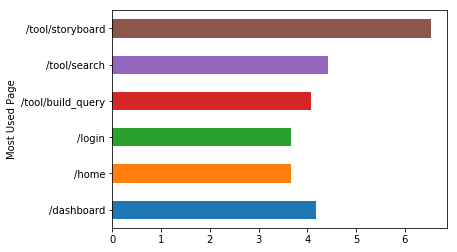

In [102]:
most_used_pages_weekly_logins.plot.barh()

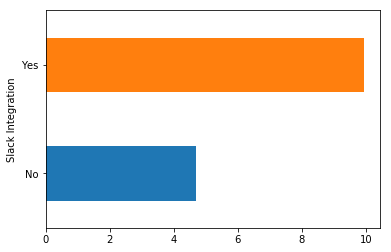

In [103]:
slack_integration_weekly_logins.plot.barh()

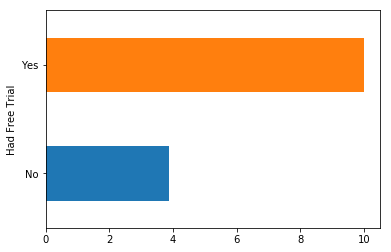

In [104]:
had_free_trial_weekly_logins.plot.barh()

Based on these charts, the categories or groups that had high engagement are:
1. Users who use the /tool/storyboard page the most. 
2. Users who have the Slack integration. 
3. Users who had a free trial. 

# Final Remarks

Users who use the /tool/storyboard page might have high engagement rates since it seems these employees are managing the storyboard for their given companies. Therefore, they would need to log in frequently, refresh, or update the page.

Users who have had a free trial might be more inclined to use the software since they have experience navigating the tool and are paying for it.